# Part II: Machine Learning Analysis 

This is the continuation of "Sustainability_Analysis.ipynb" where the data from the UN's Global Sustainable Development Goals website was cleaned and merged into the csv file below.

Country development ranking determined by the Human Development Index for 2020 was downloaded as a csv file and referenced here: https://worldpopulationreview.com/countries/developed-countries/

In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from scipy import stats

In [2]:
# Read in the csv file
sustainability = pd.read_csv('data/merged_electronic_hdi.csv')
sustainability.head()

,name,TimePeriod,HDI,Population,"Electronic Waste Recycling, per capita (Kg)","Electronic Waste Generated, per capita (Kg)"
0,Albania,2010,0.785,2877.797,NaN,4.391893
1,Albania,2011,0.785,2877.797,NaN,4.857921
2,Albania,2012,0.785,2877.797,NaN,5.310308
3,Albania,2013,0.785,2877.797,3.237495,5.740930
4,Albania,2014,0.785,2877.797,4.242644,6.112550


In [3]:
# Drop null values
print(sustainability.info())
sustainability = sustainability.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 6 columns):
name                                           620 non-null object
TimePeriod                                     620 non-null int64
HDI                                            620 non-null float64
Population                                     620 non-null float64
Electronic Waste Recycling, per capita (Kg)    486 non-null float64
Electronic Waste Generated, per capita (Kg)    620 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 29.2+ KB
None


In [4]:
# Cleaned dataset has 486 rows and 6 columns
print(sustainability.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 3 to 619
Data columns (total 6 columns):
name                                           486 non-null object
TimePeriod                                     486 non-null int64
HDI                                            486 non-null float64
Population                                     486 non-null float64
Electronic Waste Recycling, per capita (Kg)    486 non-null float64
Electronic Waste Generated, per capita (Kg)    486 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 26.6+ KB
None


### Global data

In [5]:
# Create a list of the columns

columns = ['name','HDI', 'Population','TimePeriod', 'Electronic Waste Recycling, per capita (Kg)', 'Electronic Waste Generated, per capita (Kg)']

#  Create a new df for the countries of interest with the columns. 
world_sustainability = sustainability.loc[:,  columns]
world_sustainability

,name,HDI,Population,TimePeriod,"Electronic Waste Recycling, per capita (Kg)","Electronic Waste Generated, per capita (Kg)"
3,Albania,0.785,2877.797,2013,3.237495,5.740930
4,Albania,0.785,2877.797,2014,4.242644,6.112550
5,Albania,0.785,2877.797,2015,4.889079,6.451386
6,Albania,0.785,2877.797,2016,5.103762,6.736817
7,Albania,0.785,2877.797,2017,5.303011,6.994344
...,...,...,...,...,...,...
608,Ukraine,0.751,43733.762,2018,0.889866,7.588038
609,Ukraine,0.751,43733.762,2019,0.909222,7.739957
617,Zimbabwe,0.535,14862.924,2017,0.002107,1.077279
618,Zimbabwe,0.535,14862.924,2018,0.002024,1.081951


In [6]:
world_sustainability['name'].unique()


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'Iceland',
       'India', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Namibia', 'Netherlands', 'Norway', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Rwanda', 'Saint Lucia', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Uganda', 'Ukraine', 'Zimbabwe'],
      dtype=object)

## Machine Learning SKlearn Linear Regression 

In [7]:
# Assign the data to X and y and reshape data into array

X = world_sustainability[["TimePeriod", "HDI", "Population", "Electronic Waste Recycling, per capita (Kg)"]]
y = world_sustainability[["Electronic Waste Generated, per capita (Kg)"]]


#y = whether or not met goal
print("Shape: ", X.shape, y.shape)
print(X)
print(y)

Shape:  (486, 4) (486, 1)
     TimePeriod    HDI  Population  \
3          2013  0.785    2877.797   
4          2014  0.785    2877.797   
5          2015  0.785    2877.797   
6          2016  0.785    2877.797   
7          2017  0.785    2877.797   
..          ...    ...         ...   
608        2018  0.751   43733.762   
609        2019  0.751   43733.762   
617        2017  0.535   14862.924   
618        2018  0.535   14862.924   
619        2019  0.535   14862.924   

     Electronic Waste Recycling, per capita (Kg)  
3                                       3.237495  
4                                       4.242644  
5                                       4.889079  
6                                       5.103762  
7                                       5.303011  
..                                           ...  
608                                     0.889866  
609                                     0.909222  
617                                     0.002107  
618    

In [8]:
# Use sklearn's `train_test_split` to split the data between training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [9]:
# Use Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Fit model to training data

model.fit(X_train, y_train)
trainingScore = model.score(X_train, y_train)
testingScore = model.score(X_test, y_test)

print(f"Training Score: {trainingScore}")
print(f"Testing Score: {testingScore}")

Training Score: 0.883542081128342
Testing Score: 0.8310275118420609


Text(0.5, 1.0, 'Residual Plot')

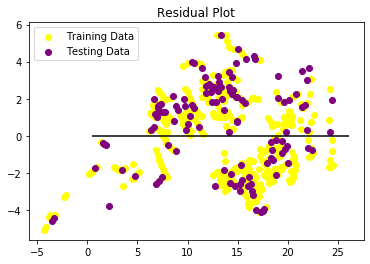

In [10]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="yellow", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [11]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 5.745037832447084, R2: 0.8310275118420609


# Conclusion:
Although the final r2 value of 0.83 is reasonable, the data set is limited at 483 rows and would benefit from adding more features and entries to generalize to world data.  More feature engineering is needed to add to our machine learning model in order to improve the predictive capabilities. Future analysis will include features like land mass and GDP.